# <font color= 'purple'>Andrielly Pereira </font>

## <font color ='black'>Desafio FADESP Processo Seletivo</font>

In [ ]:
# Versão linguagem Python
from platform import python_version
print('Versão de Linguagem Python Usado Neste Jupyter Notebook:', python_version())

## Inicializando o Projeto

In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

### Carregando os Pacotes

In [1]:
# manipulação e Visualização de dados
import time
import pickle
import sklearn
import datetime
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt


# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Formatação dos Gráficos
plt.style.use('fivethirtyeight')
plt.figure(1, figsize = (15, 6))
%matplotlib inline

In [ ]:
# Versões dos Pacotes usados
%reload_ext watermark
%watermark -a "Andrielly Moraes" --iversions

## Carregando os Dados

In [2]:
# Carregue o dataset
filename = 'https://raw.githubusercontent.com/andriellymoraespereira/desafio-fadesp-processo-seletivo/master/data/dataset_desafio_fadesp.csv'
df = pd.read_csv(filename, index_col = 0, encoding = 'latin-1')

Armagenando o dataset em um banco de dados chave-valor SQLite 

In [3]:
conn = sqlite3.connect('enterprise.db')

In [4]:
df.to_sql(name='sales', con=conn)

51290

In [5]:
!sqlite3 enterprise.db ".tables"

sales


In [6]:
# salvando os dados
!sqlite3 enterprise.db "PRAGMA table_info(sales)"

0|Row ID|INTEGER|0||0
1|Order ID|TEXT|0||0
2|Order Date|TEXT|0||0
3|Ship Date|TEXT|0||0
4|Ship Mode|TEXT|0||0
5|Customer ID|TEXT|0||0
6|Customer Name|TEXT|0||0
7|Segment|TEXT|0||0
8|City|TEXT|0||0
9|State|TEXT|0||0
10|Country|TEXT|0||0
11|Postal Code|REAL|0||0
12|Market|TEXT|0||0
13|Region|TEXT|0||0
14|Product ID|TEXT|0||0
15|Category|TEXT|0||0
16|Sub-Category|TEXT|0||0
17|Product Name|TEXT|0||0
18|Sales|REAL|0||0
19|Quantity|INTEGER|0||0
20|Discount|REAL|0||0
21|Profit|REAL|0||0
22|Shipping Cost|REAL|0||0
23|Order Priority|TEXT|0||0


In [7]:
# recuperando os dados direto em um pandas dataframe
df_read = pd.read_sql('SELECT * FROM sales', con = conn)

In [8]:
type(df_read)

pandas.core.frame.DataFrame

In [9]:
df_read

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [10]:
query = """
           SELECT *
           FROM sales;
        """
df_read = pd.read_sql(query, con=conn, index_col="Row ID")
df_read 

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Row ID,,,,,,,,,,,,,,,,,,,,,
42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium


Criando uma nova variavel para a quantidade total vendida.

In [11]:
query = """
           SELECT *, "Quantity" * "Sales" AS "total"
           FROM sales;
        """
df_read = pd.read_sql(query, con=conn, index_col="Row ID")
df_read 

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,total
Row ID,,,,,,,,,,,,,,,,,,,,,
42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium,816.600
22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium,361.098
48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High,264.480
11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High,134.595
22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium,568.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium,27.808
47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium,3.990
8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium,79.200


Salvando os novos dados na tabela sales

In [12]:
df_read.to_sql(name='sales', con=conn, if_exists = 'replace')

51290

In [13]:
df_read = pd.read_sql('SELECT * FROM sales', con=conn)
df_read

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,total
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium,816.600
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium,361.098
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High,264.480
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High,134.595
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium,568.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium,27.808
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium,3.990
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium,79.200
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium,7.120


In [14]:
# fechando a conexão com o banco de dados
conn.close()

### Análise Exploratória

Vamos explorar os dados por diferentes perspectivas e compreender um pouco mais o relacionamento entre as variáveis.

In [ ]:
# Colunas
df.columns

In [15]:
# Renomeado as colunas
df = df.rename(columns={
    "Row ID": "Row_ID",
    "Order ID": "Order_ID",
    "Order Date": "Order_Date",
    "Ship Date": "Ship_Date",
    "Ship Mode": "Ship_Mode",
    "Customer ID": "Customer_ID",
    "Customer Name": "Customer_Name",
    "Product ID": "Product_ID",
    "Sub-Category": "Sub_Category",
    "Product Name": "Product_Name",
    "Shipping Cost": "Shipping_Cost",
    "Order Priority": "Order_Priority"
})

In [16]:
# Verificação de total de valores únicos por coluna
df.nunique()

Order_ID          25035
Order_Date         1430
Ship_Date          1464
Ship_Mode             4
Customer_ID        1590
Customer_Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product_ID        10292
Category              3
Sub_Category         17
Product_Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping_Cost     10037
Order_Priority        4
dtype: int64

In [17]:
# Resumo das colunas numéricas
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Shipping_Cost
count,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [18]:
# Verificando dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 42433 to 36388
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        51290 non-null  object 
 1   Order_Date      51290 non-null  object 
 2   Ship_Date       51290 non-null  object 
 3   Ship_Mode       51290 non-null  object 
 4   Customer_ID     51290 non-null  object 
 5   Customer_Name   51290 non-null  object 
 6   Segment         51290 non-null  object 
 7   City            51290 non-null  object 
 8   State           51290 non-null  object 
 9   Country         51290 non-null  object 
 10  Postal Code     9994 non-null   float64
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product_ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub_Category    51290 non-null  object 
 16  Product_Name    51290 non-null  object 
 17  Sales           51290 non-n

Para esta análise vamos excluir a variavel Postal Code 

In [19]:
df = df.drop(columns=['Postal Code'])

In [20]:
# Convertendo a coluna de data para o tipo data
df.Order_Date  = pd.to_datetime(df.Order_Date)
df.Ship_Date  = pd.to_datetime(df.Ship_Date)

C:\Users\Andrielly\AppData\Local\Temp\ipykernel_14216\3083514112.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.Order_Date  = pd.to_datetime(df.Order_Date)
C:\Users\Andrielly\AppData\Local\Temp\ipykernel_14216\3083514112.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.Ship_Date  = pd.to_datetime(df.Ship_Date)


In [21]:
# tipos de dados
df.dtypes

Order_ID                  object
Order_Date        datetime64[ns]
Ship_Date         datetime64[ns]
Ship_Mode                 object
Customer_ID               object
Customer_Name             object
Segment                   object
City                      object
State                     object
Country                   object
Market                    object
Region                    object
Product_ID                object
Category                  object
Sub_Category              object
Product_Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping_Cost            float64
Order_Priority            object
dtype: object

In [22]:
# Range de datas do periodo que ocorreram as vendas
print('Data Mínima:', df['Order_Date'].min())
print('Data Maxíma:', df['Order_Date'].max())

Data Mínima: 2011-01-01 00:00:00
Data Maxíma: 2014-12-31 00:00:00


Agora vamos conhecer os valores dentro das váriaveis region, category, Ship Mode, Market

In [23]:
# Contagem (Region)
df['Region'].value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

In [24]:
# Contagem (Category)
df['Category'].value_counts()

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

In [25]:
# Contagem (Ship Mode)
df['Ship_Mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship_Mode, dtype: int64

In [26]:
# Contagem (Market)
df['Market'].value_counts()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

Identificão dos produtos mais vendidos e analisando sua distribuição geográfica.

In [27]:
df.groupby(['Country','Product_Name'])['Quantity'].sum().sort_values(ascending=False).reset_index()

,Country,Product_Name,Quantity
0,United States,Staples,876
1,United States,KI Adjustable-Height Table,74
2,United States,Avery Non-Stick Binders,71
3,United States,Storex Dura Pro Binders,71
4,United States,GBC Premium Transparent Covers with Diagonal L...,67
...,...,...,...
31960,New Zealand,"Apple Headset, with Caller ID",1
31961,New Zealand,"Apple Speaker Phone, VoIP",1
31962,Togo,"Eldon Trays, Single Width",1
31963,France,"OIC Push Pins, Bulk Pack",1


O produto mais vendido foi Staples e, seu maior produtor é United States.

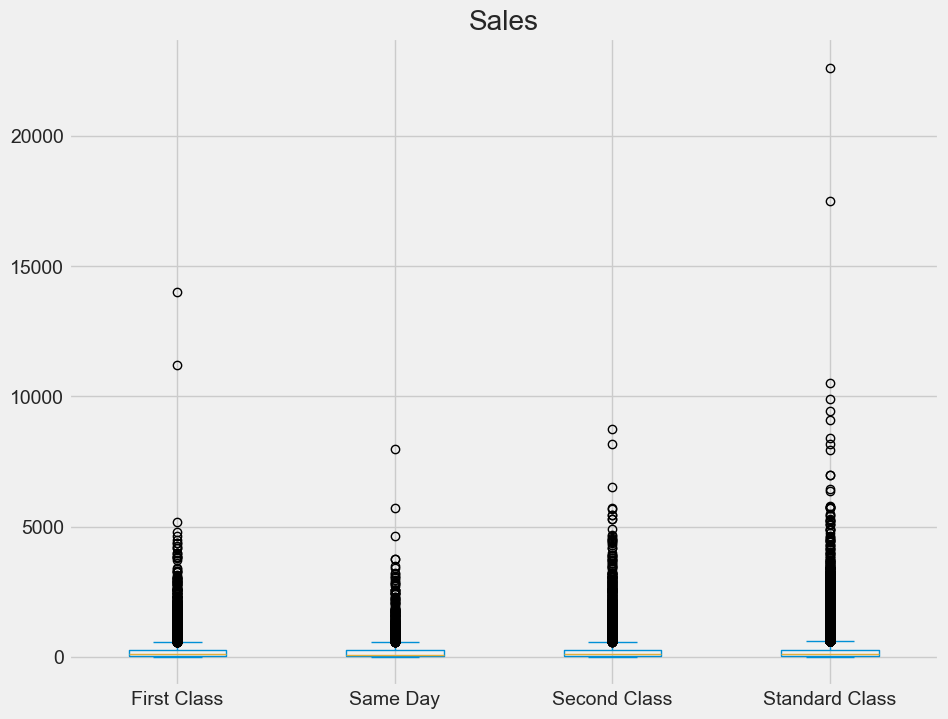

In [28]:
# BoxPlot do Valor da venda realizada por Modo de envio do pedido.
ax = df.plot.box(column="Sales", by="Ship_Mode", figsize=(10, 8))

O modo de envio classe padrão apresdentar os maiores outlirs em relação ao Valor da venda realizada.

In [29]:
# Correlação (tabela)
df.corr()

,Sales,Quantity,Discount,Profit,Shipping_Cost
Sales,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,-0.086722,-0.019875,1.000000,-0.316490,-0.079056
Profit,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping_Cost,0.768073,0.272649,-0.079056,0.354441,1.000000


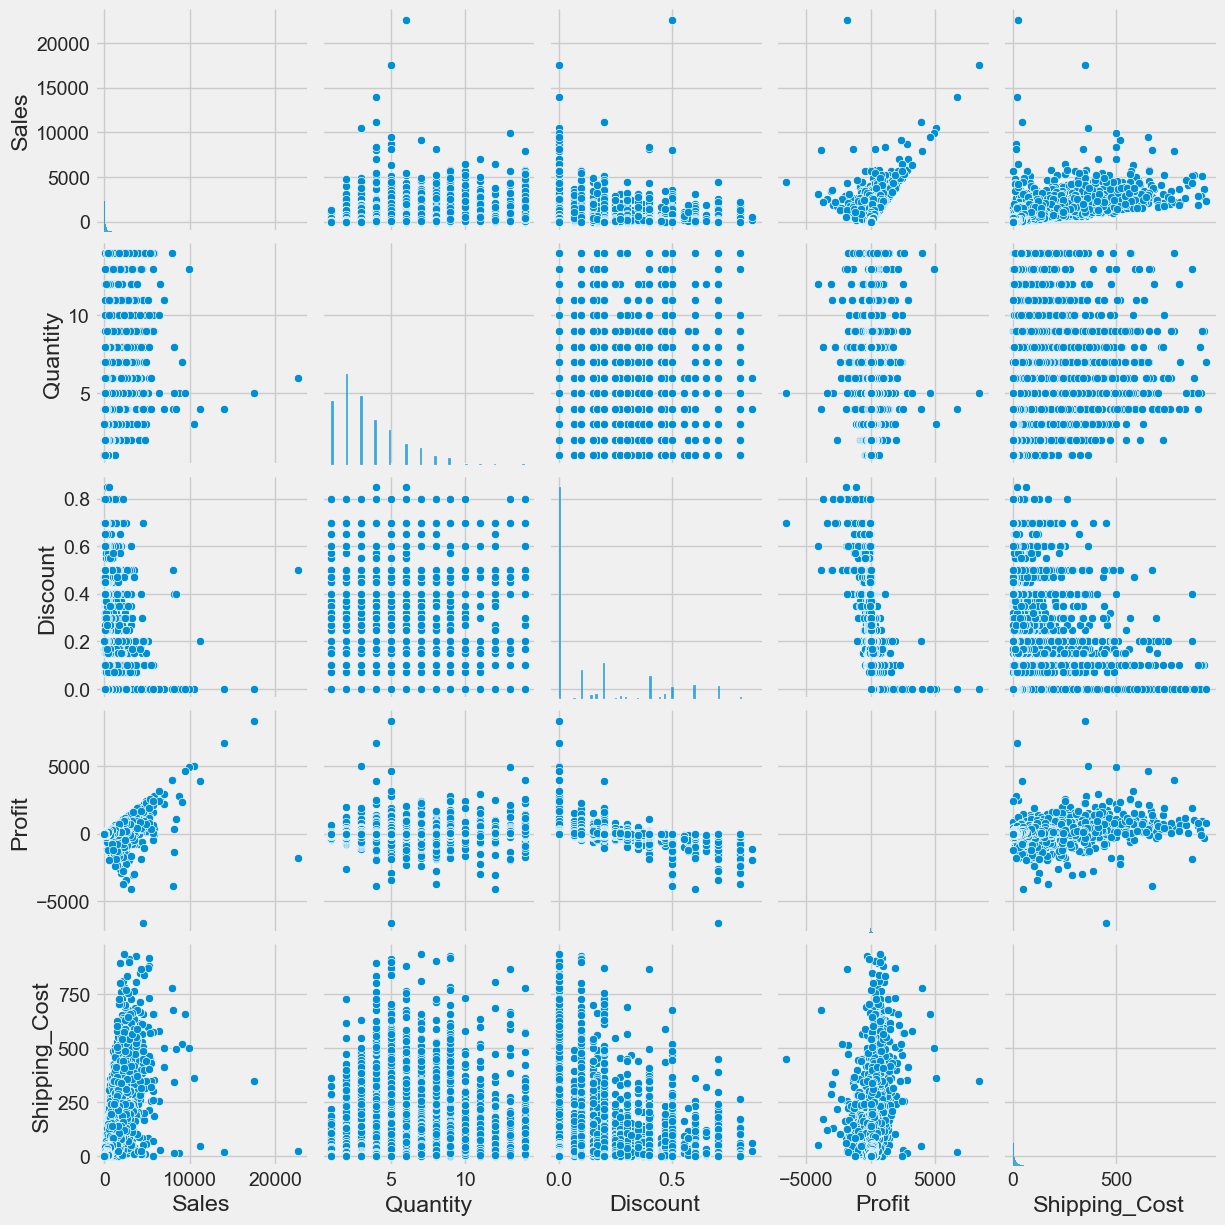

In [30]:
# Correlação (visual)
sns.pairplot(df)

<Figure size 1000x800 with 0 Axes>

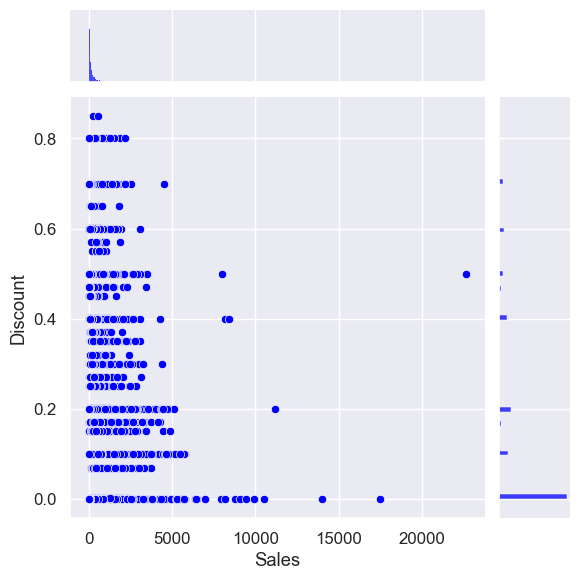

In [31]:
# análise da relação entre Disconto(Discount) e valor da venda realisada (sales)
# Plot
plt.figure(figsize = (10, 8))
sns.set(font_scale = 1.1)
sns.jointplot(data = df, 
              x = 'Sales', 
              y = 'Discount',
              color = 'blue')

Observando os histogramas, podemos ver que os dados não tem distribuídos normal.

Observando o gráfico de dispersão, não parece haver correlação entre as duas variáveis. Vamos confirmar calculando o coeficiente de correlação entre elas.

In [32]:
# Correlação
df[['Sales', 'Discount']].corr()

,Sales,Discount
Sales,1.000000,-0.086722
Discount,-0.086722,1.000000


Há uma correlação inversa entre o Desconto realizado e  Valor da venda realizada, os descontos impulsionam as vendas.

<Figure size 1000x800 with 0 Axes>

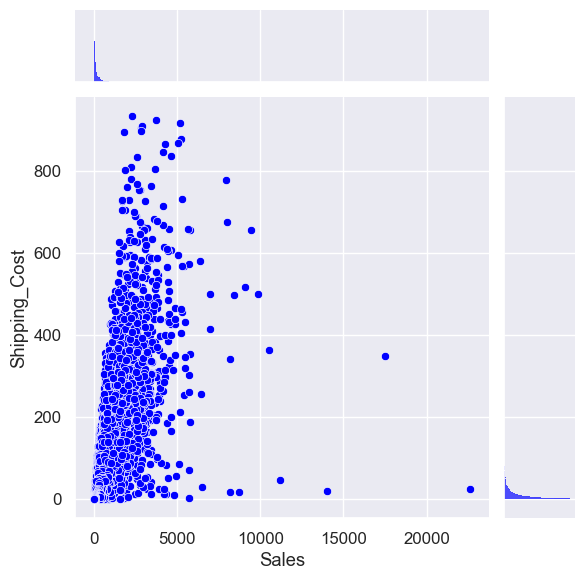

In [33]:
# análise da relação entre Quantidade de produtos vendidos e o Valor do frete.
# Plot
plt.figure(figsize = (10, 8))
sns.set(font_scale = 1.1)
sns.jointplot(data = df, 
              x = 'Sales', 
              y = 'Shipping_Cost',
              color = 'blue')

Observando os histogramas, podemos ver que os dados não tem distribuídos normal.

Observando o gráfico de dispersão, não parece haver correlação entre as duas variáveis. Vamos confirmar calculando o coeficiente de correlação entre elas.

In [34]:
# Correlação
df[['Sales', 'Shipping_Cost']].corr()

,Sales,Shipping_Cost
Sales,1.000000,0.768073
Shipping_Cost,0.768073,1.000000


Há uma alta correlação positiva entre a Quantidade de produtos vendidos e o Valor do frete.

Agora vamos separamos os dados em dois conjuntos (2013 e 2014) para exibir a evolução do lucro bruto ao longo de cada ano. Plotando no mesmo gráfico podemos fazer um comparativo dos anos mês a mês.

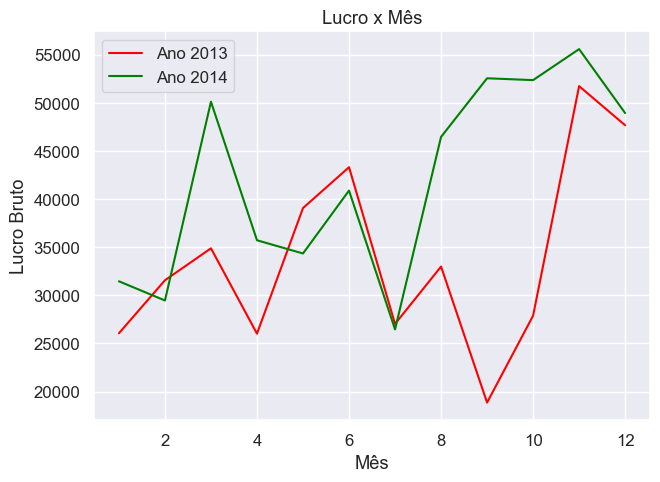

In [35]:
#Selecionando apenas as vendas de 2013
df_2013 = df[df["Order_Date"].dt.year == 2013]
#Selecionando apenas as vendas de 2014
df_2014 = df[df["Order_Date"].dt.year == 2014]
# Comparativo de lucro bruto por mês
df_2013.groupby(df_2013["Order_Date"].dt.month)["Profit"].sum().plot(color='red', label='Ano 2013')
df_2014.groupby(df_2014["Order_Date"].dt.month)["Profit"].sum().plot(color='green', label='Ano 2014')
plt.title("Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro Bruto")
plt.legend()
plt.show()

No gráfico Lucro x Mês, verifica-se que o ano de 2014 apresentou maior lucro por mês, comparado ao ano de 2013.

## Pré-Processamento de Dados Para Construção de Modelos de Machine Learning.

In [36]:
# Variáveis de entrada (variáveis preditoras)
X = df[['Quantity', 
        'Discount',
        'Profit', 
        'Shipping_Cost']]

In [37]:
# Variável de saída (variável alvo ou target)
y = df['Sales']

In [38]:
# Divisão em dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [39]:
len(X_treino)

35903

In [40]:
len(X_teste)

15387

### Padronização

In [41]:
scaler = StandardScaler()

In [42]:
scaler.fit(X_treino)

StandardScaler()

In [43]:
X_treino = scaler.transform(X_treino)

In [44]:
X_teste = scaler.transform(X_teste)

In [45]:
X_treino[:5]

array([[-0.20930037,  1.68365023, -0.20250422, -0.42657602],
       [-0.20930037, -0.67268864, -0.08995665, -0.41257141],
       [-0.64887399,  1.21238246, -0.1815883 , -0.43366478],
       [ 0.66984688,  1.21238246, -0.22862146, -0.22860961],
       [-0.20930037, -0.67268864,  0.00615699, -0.16757716]])

In [46]:
X_teste[:5]

array([[ 0.66984688,  2.15491801, -0.2610688 , -0.37574447],
       [-0.20930037, -0.67268864, -0.10898018, -0.40479107],
       [-0.64887399, -0.67268864,  0.25130597, -0.02545629],
       [-0.20930037,  0.50548079,  0.0030445 ,  0.1011039 ],
       [ 0.66984688, -0.67268864,  0.1369645 , -0.27650192]])

# Construção, Treinamento e Avaliação do Modelo de Regressão Linear (Benchmark)
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [47]:
# Modelo
modelo = LinearRegression()

In [48]:
# Treinamento
modelo.fit(X_treino, y_treino)

LinearRegression()

In [49]:
print('Coeficientes: \n', modelo.coef_)

Coeficientes: 
 [ 54.06703534  26.6738227  139.62856176 311.32233748]


In [50]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
Quantity,54.067035
Discount,26.673823
Profit,139.628562
Shipping_Cost,311.322337


### Avaliação do Modelo

In [51]:
# Previsões com dados de teste
pred = modelo.predict(X_teste)

In [52]:
# Imprime as 10 primeiras previsões
pred[:10]

array([187.16151294,  76.3986095 , 221.03379339, 280.963141  ,
       198.21167531, 787.34853409, 214.94484859,  70.12692616,
        95.56530107,  13.30532911])

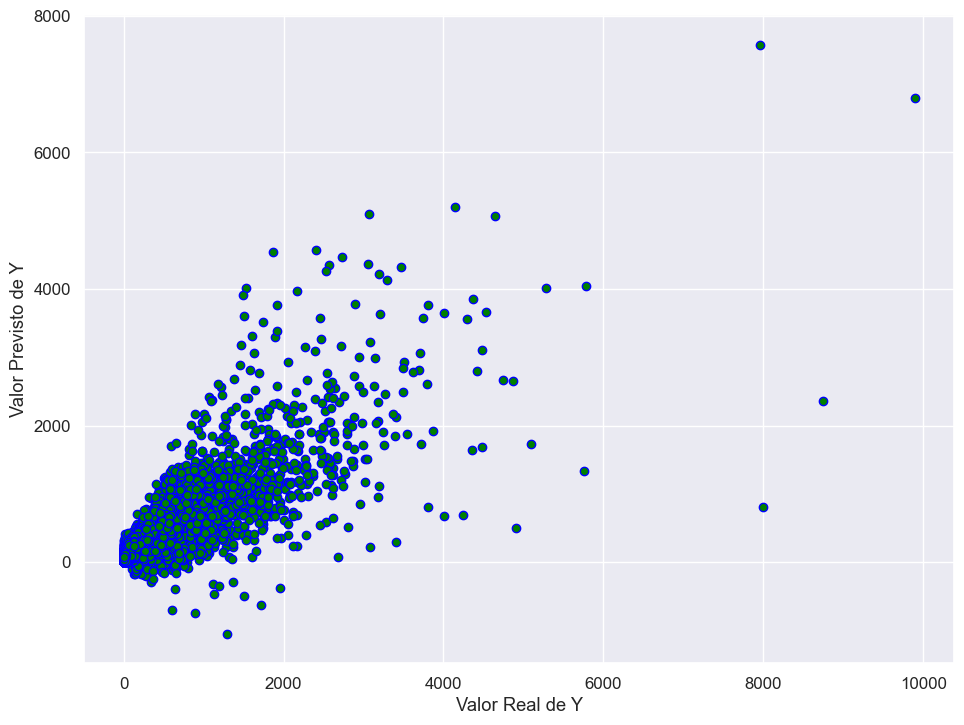

In [53]:
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred, color = 'green', edgecolors = 'blue')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

A partir do gráfico de dispersão, podemos ver que há uma correlação psitiva entre os y's previstos e os y's reais nos dados do teste.

In [54]:
# Valor médiode venda realizada pelos clientes
df['Sales'].mean()

246.4905812025736

In [55]:
# Valor mínimo
df['Sales'].min()

0.444

In [56]:
# Valor máximo
df['Sales'].max()

22638.48

In [57]:
# MAE - Erro Médio Absoluto
mean_absolute_error(y_teste, pred)

117.56502010060574

O MAE prevê que, em média, as previsões do nosso modelo (Valor da venda realizada) estão erradas em aproximadamente 117.57 reais, o que é aproximadamente a metade do valor comparado ao valor médio de venda realizada por cliente.

In [58]:
# MSE - Erro quadrático médio
mean_squared_error(y_teste, pred)

64112.65685265734

In [59]:
# MAPE
MAPE = np.mean(np.abs((y_teste - pred) / y_teste)) * 100
print(f"Valor do MAPE dado em percentual: {MAPE}")

Valor do MAPE dado em percentual: 191.8136439938189


In [60]:
# Coeficiente R2
r2_score(y_teste, pred)

0.6956564976777171

In [61]:
# Variância Explicada
explained_variance_score(y_teste, pred)

0.6956713021745818

Nosso modelo é capaz de explicar 70% da variância dos dados, o que é bom.

O coeficiente R² = 0,.6957 significa que o modelo linear explica 69,57% da variância da variável dependente a partir do regressores (variáveis independentes) incluídas no modelo linear.

### Resíduos

C:\Users\Andrielly\AppData\Local\Temp\ipykernel_14216\4074444428.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_teste - pred),


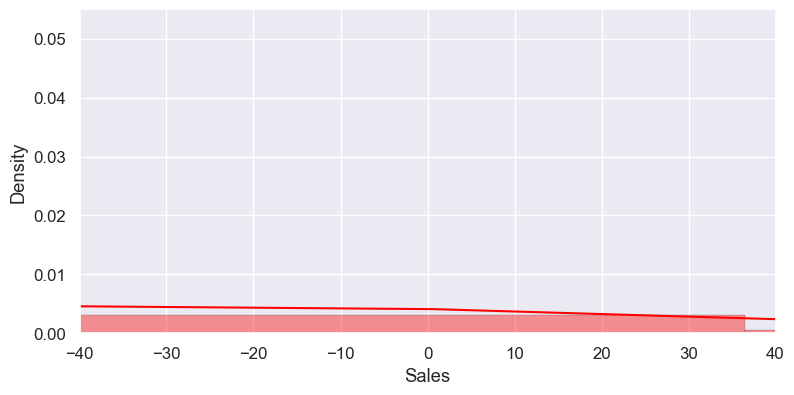

In [62]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

In [75]:
# arquivo Pickle 
with open("modelo.pkl", "wb") as arquivo:
    pickle.dump(modelo, arquivo)   

In [ ]:
with open("modelo.pkl", "rb") as arquivo:
    pickle.dump(arquivo)  